In [1]:
using Plots
using Colors
using Images
using DifferentialEquations
using Statistics
using JLD2

In [5]:
# Number of spots
# Intensities of spots
seed = 11
radius = 4
sol = load("../../Simulations/sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp")
maxima = findlocalmaxima(sol[:,:,1,end], edges=false)

vals_maxima = sol[:,:,1,end][maxima]
n_maxima = length(vals_maxima[vals_maxima .> 10]) # Excludes spots less than intensity 10

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492


2

In [6]:
diff = sum(sol[:,:,1,1] - sol[:,:,1,2])
diff
# A two-patch solution had diff=0.79
# A one-patch solution had diff=0.0039

0.05590619909743566

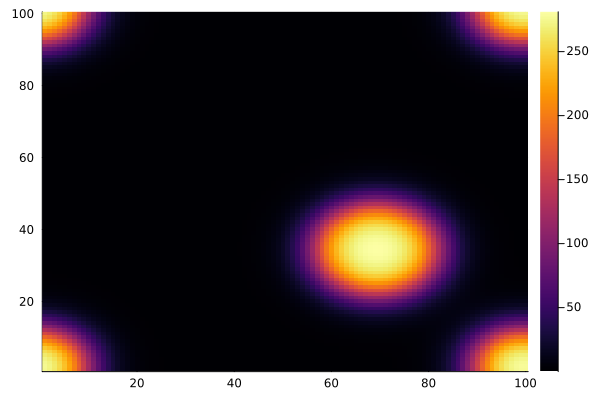

In [7]:
heatmap(sol[:,:,1,end])

In [400]:
# For all random seeds
# For each radius
# Record number of patches
# Record intensity of patches
# Record stdev for patch intensity

seeds = (1,2,3,4,5,6,7,8,9,10,11)
radii = [2,3,4,5,6,7,8,10]

avg_m = []
std_m = []
avg_n = []
std_n = []

for radius in radii
    n = []
    m = []
    for seed in seeds
        sol = load("sims/simple_30min_seed_$(seed)_radius_$(radius).jld2", "sol_simp");
        locs = findlocalmaxima(sol[:,:,1,end], edges=false)
        maxima = sol[:,:,1,end][locs]
        maxima = maxima[maxima .> 10]
        append!(m, maxima)
        append!(n, length(maxima))
    end
    append!(avg_n, mean(n))
    append!(avg_m, mean(m))
    append!(std_n, std(n)*(!isnan(std(n)))) # workaround to transform NaN to 0
    append!(std_m, std(m)*(!isnan(std(m))))
end

┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type Base.RefValue{SciMLBase.Void{Main.#simple!}} does not exist in workspace; reconstructing
└ @ JLD2 /home/dinosaur/.julia/packages/JLD2/ifXF8/src/data/reconstructing_datatypes.jl:492
┌ Warning: type

In [401]:
using DataFrames
experimental = CSV.read("siteNumber.csv", DataFrame)
exp_rad = experimental[!, "EffectiveRadius"]
exp_n = experimental[!, "Bud Number"];

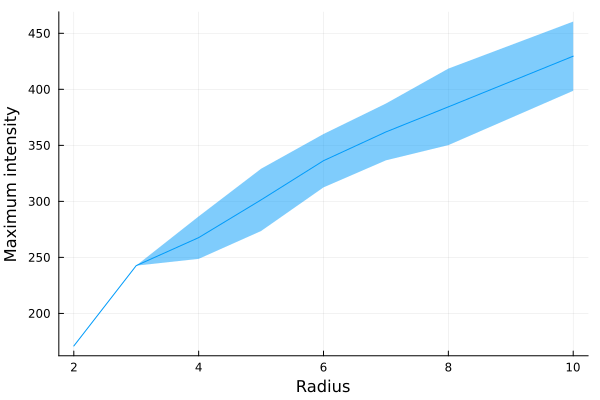

In [402]:
plot(radii, avg_m, ribbon=std_m, fillalpha=.5, label=false, xaxis="Radius", yaxis="Maximum intensity")
#savefig("maxint_by_r_tmp.png")

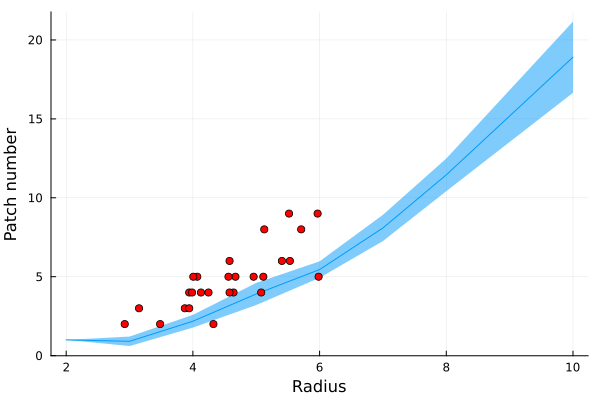

In [405]:
plot(radii, avg_n, ribbon=std_n, fillalpha=.5, label=false, xaxis="Radius", yaxis="Patch number")
scatter!(exp_rad, exp_n, color="red", label=false)
#savefig("maxn_by_r_tmp.png")